# Notebook 01: Exploring Medal Distributions by User Performance Tier

In this notebook, we explore how Kaggle user tiers relate to kernel success, as measured by medals.  
We begin by summarizing medal distribution and then visualize patterns across different user performance tiers.


In [1]:
%pip install matplotlib seaborn pandas --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## 1️. Setup Paths

We define the path to the `../data` folder (where the Meta Kaggle CSVs are located) and an output folder for storing plots.



In [2]:
DATA_DIR = Path("../data")
OUTPUT_DIR = Path("../outputs/Notebook 01")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

## 2️. Load Data

We load the following files:
- `Users.csv`: Contains user profiles and performance tiers
- `Kernels.csv`: Metadata for each kernel, including author and medal


In [3]:
users = pd.read_csv(DATA_DIR / "Users.csv", low_memory=False)
kernels = pd.read_csv(DATA_DIR / "Kernels.csv", low_memory=False)

print(f"Users: {users.shape}")
print(f"Kernels: {kernels.shape}")

Users: (24934330, 7)
Kernels: (1516137, 16)


## 3️. Clean & Merge Data

- Rename key columns for merging
- Parse `CreationDate` in kernels
- Merge `Users ←→ Kernels` on `UserId`  
  This gives us access to both medal and tier for each kernel.


In [4]:
users = users.rename(columns={"Id": "UserId"})
kernels = kernels.rename(columns={"Id": "KernelId", "AuthorUserId": "UserId"})

kernels["CreationDate"] = pd.to_datetime(kernels["CreationDate"], errors="coerce")

kernel_data = kernels.merge(
    users[["UserId", "UserName", "PerformanceTier"]],
    on="UserId",
    how="left"
)

## 4️. Summary Statistics

Let’s take a look at:
- Overall distribution of medals
- Top authors by number of medal-winning kernels


In [5]:
print("\nKernel Medal Distribution:")
print(kernel_data["Medal"].value_counts(dropna=False))

print("\nTop Authors by # of Medal Kernels:")
top_authors = (
    kernel_data[kernel_data["Medal"].notna()]
    .groupby("UserName")["KernelId"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)
print(top_authors)


Kernel Medal Distribution:
Medal
NaN    1365407
3.0     114759
2.0      25119
1.0      10852
Name: count, dtype: int64

Top Authors by # of Medal Kernels:
UserName
mpwolke              988
stpeteishii          259
tunguz               247
sasakitetsuya        238
gauravduttakiit      234
docxian              224
ravi20076            201
gpreda               184
abdallahwagih        182
satyaprakashshukl    175
Name: KernelId, dtype: int64


## 5️. Visualize: Medals by User Tier

To see how medal frequency varies across user tiers (e.g., Expert, Master, Grandmaster), we plot:
- **X-axis**: User Performance Tier
- **Y-axis**: Number of kernels with medals
- **Hue**: Medal Type (1 = Bronze, 2 = Silver, 3 = Gold)


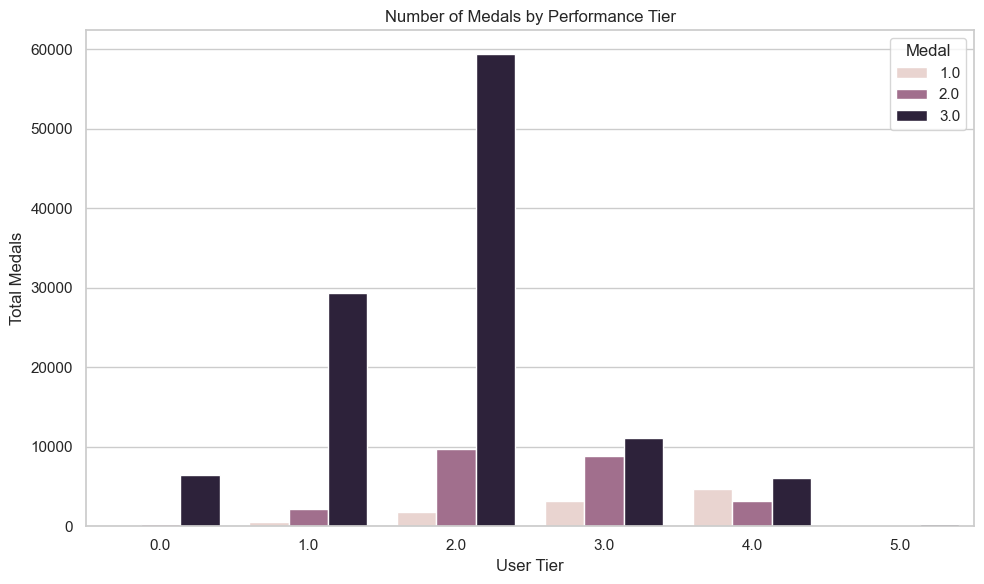

In [6]:
medal_by_tier = (
    kernel_data[kernel_data["Medal"].notna()]
    .groupby(["PerformanceTier", "Medal"])
    .size()
    .reset_index(name="Count")
)

plt.figure(figsize=(10, 6))
sns.barplot(data=medal_by_tier, x="PerformanceTier", y="Count", hue="Medal")
plt.title("Number of Medals by Performance Tier")
plt.ylabel("Total Medals")
plt.xlabel("User Tier")
plt.legend(title="Medal")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "medals_by_tier.png", dpi=300)
plt.show()

## Takeaways:

- A majority of medal-winning kernels come from users in higher tiers, especially Experts and above.
- Kaggle Grandmasters, while fewer in number, have disproportionately high success rates.
- This validates the tier system as a reliable signal of code quality.

In the next notebook, we will explore what makes a kernel successful — in terms of markdown, timing, and code characteristics.


**Next:** `02_kernel_success_patterns.ipynb`
